# Assignment 4
- **Assigned:** Tuesday, March 29
- **Due:** Tuesday, April 12 @ 5pm ET


In [5]:
import copy
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

import scipy.linalg
from scipy import linalg as la
from scipy.integrate import odeint

import ipywidgets as widgets 
from IPython.display import display, HTML

from sympy import Matrix, init_printing
init_printing()

float_formatter = "{:.6f}".format
np.set_printoptions(formatter={'float': '{: 0.6f}'.format})
np.set_printoptions(precision=6)
plt.rcParams["font.serif"] = "cmr12"
plt.rcParams["figure.dpi"] = 150

import matplotlib
matplotlib.rcParams.update({'font.size': 16})
import sympy as sym
from scipy import optimize 
from scipy.optimize import fsolve
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
np.set_printoptions(precision=3)
import scipy.linalg

$
\newcommand{\njbu}{\mathbf{u}}
\newcommand{\njbf}{\mathbf{f}}
\newcommand{\njbg}{\mathbf{g}}
\newcommand{\njbh}{\mathbf{h}}
\newcommand{\njba}{\mathbf{a}}
\newcommand{\njbb}{\mathbf{b}}
\newcommand{\njbi}{\mathbf{i}}
\newcommand{\njbe}{\mathbf{e}}
\newcommand{\njbd}{\mathbf{d}}
\newcommand{\njbp}{\mathbf{p}}
\newcommand{\njbq}{\mathbf{q}}
\newcommand{\njbr}{\mathbf{r}}
\newcommand{\njby}{\mathbf{y}}
\newcommand{\njbv}{\mathbf{v}}
\newcommand{\njbw}{\mathbf{w}}
\newcommand{\njbx}{\mathbf{x}}
$

## Problem 1

The goal is to estimate the location $x = [x_1 ~~x_2 ]$
of a point $A$ in a plane using angle measurements $z_i$ from several
points $B_i$ located on the $x_1$ axis, each $l_i$ from the origin. The
situation is shown in the figure.

<div align="center">
  <img src="http://drive.google.com/uc?export=view&id=14yR3leH6Gpp6ZWwz3mnhVjhXpj6-NkXU" alt="problem description" width="20%" />
</div>

The angle measurements are related to the locations of $A$ and $B$ by
the nonlinear relation:
$$
z_i = \tan^{-1}\frac{x_2}{x_1-l_i} + v_i
$$
Assume that $E[v_i] =0$ and $E[v_iv_j] = r_i \Delta(i-j)$. 

Three measurements were taken
1.   $l_1 = 0$ ft, $z_1 = 30.1$ deg, and $r_1 = 0.01$ deg$^2$
2.   $l_2 = 500$ ft, $z_2 = 45.0$ deg, and $r_2 = 0.01$ deg$^2$
3.   $l_3 = 1000$ ft, $z_3 = 73.6$ deg, and $r_3 = 0.04$ deg$^2$
 
Implement in `Python` the nonlinear least squares algorithm to estimate to estimate the position of the fixed point $A$. 

> **Hint**: You will have to implement the equations shown on slide 12-4. You need to run several iterations, until it converges ($\approx 200$  iterations should suffice). Use $\hat x_0 = [1500~\text{ft}, 500~\text{ft}]^T$ and $Q_0=\left[\begin{array}{cc}
1000 & 0\\
0 & 1000
\end{array}\right]~\text{ft}^2$ as initial conditions. 

> **Hint**: For this problem, $\boldsymbol{h}(\boldsymbol{x})$ (see slide 12-4) returns a $3\times1$ vector, since we have 3 measurements

> **Note**: Remember to use the right units (i.e., use rad and not deg when doing the computations).

Print the final estimate and covariance found

In [17]:
l1=0
l2=500
l3=1000
R=np.array([[(np.deg2rad(0.01))**2,0,0],[0,(np.deg2rad(0.01))**2,0],[0,0,(np.deg2rad(0.04))**2]])
y=np.array([[np.deg2rad(30.1)],[np.deg2rad(45.0)],[np.deg2rad(73.6)]])
def h(x):
    """
    x is a row vector 1x2 with components x[0] and x[1]
    """
    h=np.zeros((3,1))
    h[0,0]=np.arctan(x[1]/(x[0]-l1))
    h[1,0]=np.arctan(x[1]/(x[0]-l2))
    h[2,0]=np.arctan(x[1]/(x[0]-l3))
    return h
def H(x):
    H=np.zeros((3,2))
    dhdx1=1/(1+(x[1]/(x[0]-l1))**2)*(-x[1])/(x[0]-l1)**2
    dhdx2=1/(1+(x[1]/(x[0]-l1))**2)*(1/(x[0]-l1))
    H[0,0]=dhdx1
    H[0,1]=dhdx2
    dhdx1=1/(1+(x[1]/(x[0]-l2))**2)*(-x[1])/(x[0]-l2)**2
    dhdx2=1/(1+(x[1]/(x[0]-l2))**2)*(1/(x[0]-l2))
    H[1,0]=dhdx1
    H[1,1]=dhdx2
    dhdx1=1/(1+(x[1]/(x[0]-l3))**2)*(-x[1])/(x[0]-l3)**2
    dhdx2=1/(1+(x[1]/(x[0]-l3))**2)*(1/(x[0]-l3))
    H[2,0]=dhdx1
    H[2,1]=dhdx2
    return H
    
    
x0=np.array([[1500], [500]])
Q0=np.array([[1000,0],[0,1000]])
xk=x0
Qk=Q0
iterations=200
for k in range(iterations):
    Q_kplus1=np.linalg.inv(np.linalg.inv(Q0)+np.matmul(H(xk).T,np.matmul(np.linalg.inv(R),H(xk))))
    x_kplus1=x0+np.matmul(Q_kplus1,np.matmul(H(xk).T,np.matmul(np.linalg.inv(R),(y-h(xk)-np.matmul(H(xk),(x0-xk))))))
    xk=x_kplus1
print("Final Position Estimate <x1,x2> is: ")
print(xk)
print("Final covariance Q_k found for this estimate is: ")
print(Q_kplus1)

Final Position Estimate <x1,x2> is: 
[[1200.536]
 [ 698.368]]
Final covariance Q_k found for this estimate is: 
[[0.3   0.254]
 [0.254 0.248]]


## Problem 2

Consider the following scalar system:
\begin{eqnarray}
x_{k+1} &=& a x_k + w_k \\ z_k &=& \sqrt{x_k^2+1} + v_k
\end{eqnarray}
where the Gaussian white noises $w$ and $v$ have the following properties:
\begin{eqnarray}
E[w_k]=0 &,& E[w_kw_l]=q \Delta(k-l) \\
E[v_k]=0 &,& E[v_kv_l]=r \Delta(k-l)
\end{eqnarray}
If we have that:
\begin{eqnarray}
\overline x(0)=E[x(0)]=1 \text{ and } E[(x(0) -\overline x(0))(x(0)-\overline x(0))]=2
\end{eqnarray}
* Develop the equations for the Kalman filter to 
estimate the unknown constant $a$ given $z(t)$. 
* Using $q=2r=1$, write a
script to test the algorithm in Python. How well does it work? Assume that $a$ is initially 1 even though it is actually 0.7


In [99]:
def C(x):
    # x is a 1 X 2 row vector
    return np.array([x[0]/(x[0]**2+1)**0.5,0])
A=np.array([[1,1],[0,1]])
q=1
r=1
a=0.7 #the system dynamics matrix to be determined, and assumed to be 1
xk_1k_1=[1, 1] #known mean for x_00
x_state=[1,1]
Qk_1k_1= np.array([[2,0],[0,0.3]]) #state vector estimate covariance
N=1000 #iterations number

for k in range (N):
    # Propagate
    xkk_1=np.matmul(A,xk_1k_1)
    Qkk_1=np.matmul(A,np.matmul(Qk_1k_1,A.T))+np.array([[q,0],[0,0]])
    # Measurement update
    Lk=np.matmul(Qkk_1,C(xkk_1).T*1/(np.matmul(C(xkk_1),np.matmul(Qkk_1,C(xkk_1).T))+r))
    xkk = xkk_1 + Lk*(np.random.normal((1+x_state[0])**0.5,r)-xk_1k_1[1]*xk_1k_1[0])
    Qkk=(1-np.matmul(Lk,C(xk_1k_1)))*Qkk_1
    x_state=[a*x_state[0],a] #system dynamics, physical evolution of discrete system
    xk_1k_1=xkk
    Qk_1k_1=Qkk
print("Estimated x k|k state ")
print(xkk)
print("Estimated Q k|k covariance ")
print(Qkk)
print("Estimated x k|k-1 state ")
print(xkk_1)
print("Estimated Q k|k-1 covariance ")
print(Qkk_1)
    

Estimated x k|k state 
[3.086 0.846]
Estimated Q k|k covariance 
[[0.683 0.   ]
 [0.    0.   ]]
Estimated x k|k-1 state 
[3.402 0.846]
Estimated Q k|k-1 covariance 
[[1.644 0.   ]
 [0.    0.   ]]


## Problem 3

For the first-order discrete system

$$
x_{k+1}=1.05 x_k +u_k
$$

The performance measure to be minimized is

$$
J=x(N)^2 + \frac{1}{2} \sum_{k=0}^{N-1} q x^2(k) + r u^2(k)
$$

a) For the case $N \to \infty$, solve the discrete equation for the
steady state $P$ and gain $F$ as a function of $q$ and $r$.

b) For $q=r=1$, confirm that the backwards recursion agrees with
this steady state prediction. Based on these results, how large do you
think $N$ needs to be before we can ignore the transient?

c) Compare the performance of the optimal controller ($q=r=1$) with
the ad-hoc design $u_k=-0.4x_k$.



the LQR optimal control results in the trajectory cost:
0.008465620732771783
the ad-hoc controller results in the suboptimal trajectory cost:
0.010043282197166306


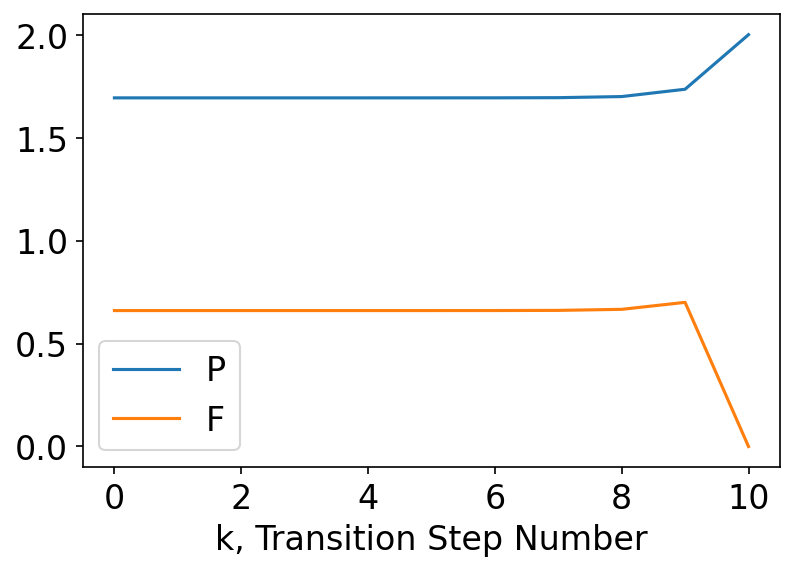

In [39]:
import matplotlib.pyplot as plt
N=10 #number of state transitions
H=2
a=1.05
b=1
q=1
r=1
x0=0.1 #Initial state 
P=np.zeros(N+1)
F=np.zeros(N+1)
U_adhoc=np.zeros(N)
x_adhoc=np.zeros(N+1)
U_LQR=np.zeros(N)
x_LQR=np.zeros(N+1)
x_LQR[0]=x0
x_adhoc[0]=x0
P[N]=H

def J(X,U):
    N=len(X)
    J=0
    for k in range (N-1):
        J+=0.5*q*X[k]**2+0.5*r*U[k]**2 
    J+= 0.5*H*X[N-1]**2
    return J

for k in reversed(range(N)):
    F[k]=b*a*P[k+1]/(r+b**2*P[k+1])
    P[k]=q+r*F[k]**2+P[k+1]*(a-b*F[k])**2
for k in range(N):
    U_LQR[k]=-F[k]*x_LQR[k]
    x_LQR[k+1]=a*x_LQR[k]+b*U_LQR[k]
    U_adhoc[k]=-0.4*x_adhoc[k]
    x_adhoc[k+1]=a*x_adhoc[k]+b*U_adhoc[k]

print("the LQR optimal control results in the trajectory cost:")
print(J(x_LQR,U_LQR))
print("the ad-hoc controller results in the suboptimal trajectory cost:")
print(J(x_adhoc,U_adhoc))

plt.plot(P,label='P')
plt.plot(F,label='F')
plt.xlabel('k, Transition Step Number')
plt.legend()
plt.show()

## Problem 4

The in-plane linearized orbital dynamics for objects in close proximity are governed by the Clohessy-Wiltshire equations
\begin{eqnarray}
\ddot x(t) &=& 3n^2x(t) + 2n \dot y(t) + u_x\\
\ddot y(t) &=& -2n \dot x + u_y \\
\end{eqnarray}
where $n \approx 0.00113$ $s^{-1}$, corresponding to an orbital period of about 93 minutes.

The goal is to minimize the performance
measure
$$
J = 10^4 x^2(T) + \frac{1}{2} \int_0^T [x^2(t) + 0.2 y^2(t) + \rho(u_x^2(t)+u_y^2(t))] dt
$$
where the final time should correspond to 1/10 orbit ($T_f = 2\pi/n/10$), $\rho = 10^8$, and the states and control are not constrained by any boundaries. 

a) Find the optimal control law by integrating the continuous-time Riccati equation with an
integration interval of 0.02 and with $ P(T) = H $
$$
-\dot P(t) = P(t)A(t) + A(t)^TP(t) + Q(t) -
P(t)B(t)R^{-1}(t)B(t)^TP(t)
$$

b) Solve the steady state algebraic Riccati equation for the steady state gains. Confirm that the numerical steady state gains agree. Do the time-varying gains differ much over this time window?

c) Compare the state response to initial condition offsets in $x,y$ of 100m using both the time varying feedbck and the steady state control. Any noticeable differences?


In [83]:
dt=0.02
n=0.00113
H=np.array([[20000,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]) #terminal cost matrix
Tf=2*3.14159265/(10*n)
N=int(Tf/dt) #number of discrete steps
rho=10**8 #control cost constant

Rxx=np.array([[1,0,0,0],[0,0.2,0,0],[0,0,0,0],[0,0,0,0]])

P=np.zeros((4,4,N+1))
u_gain=np.zeros((2,4,N)) #optimal LQR gain to be applied on the state vector
x=np.array((4,N+1))

A=np.array([[0,0,1,0],[0,0,0,1],[3*n**2,0,0,2*n],[0,0,-2*n,0]])
B=np.array([[0,0],[0,0],[1,0],[0,1]])
Ruu=np.array([[rho,0],[0,rho]])

P[0:4,0:4,N]=H

for k in reversed(range(N)):
    DP=-dt*(np.matmul(P[0:4,0:4,k+1],A)+np.matmul(A.T,P[0:4,0:4,k+1])+Rxx-np.matmul(P[0:4,0:4,k+1],np.matmul(B,np.matmul(np.linalg.inv(Ruu),np.matmul(B.T,P[0:4,0:4,k+1])))))
    P[0:4,0:4,k]=P[0:4,0:4,k+1]+DP
for k in range(N):
    u_gain[0:2,0:4,k] = - np.matmul(np.linalg.inv(Ruu),np.matmul(B.T,P[0:4,0:4,k]))
print(u_gain)

#part b) solve steady state Riccati equation
import scipy
P_SS=scipy.linalg.solve_continuous_are(A,B,Rxx,Ruu)
print("Steady state P")
print(P_SS)

<ipython-input-83-ecc3aedb4527>:21: RuntimeWarning: overflow encountered in matmul
  DP=-dt*(np.matmul(P[0:4,0:4,k+1],A)+np.matmul(A.T,P[0:4,0:4,k+1])+Rxx-np.matmul(P[0:4,0:4,k+1],np.matmul(B,np.matmul(np.linalg.inv(Ruu),np.matmul(B.T,P[0:4,0:4,k+1])))))
<ipython-input-83-ecc3aedb4527>:21: RuntimeWarning: invalid value encountered in matmul
  DP=-dt*(np.matmul(P[0:4,0:4,k+1],A)+np.matmul(A.T,P[0:4,0:4,k+1])+Rxx-np.matmul(P[0:4,0:4,k+1],np.matmul(B,np.matmul(np.linalg.inv(Ruu),np.matmul(B.T,P[0:4,0:4,k+1])))))


[[[       nan        nan        nan ...  1.200e-05  8.000e-06  4.000e-06]
  [       nan        nan        nan ... -3.616e-17 -0.000e+00 -0.000e+00]
  [       nan        nan        nan ... -4.800e-07 -1.600e-07 -0.000e+00]
  [       nan        nan        nan ...  1.085e-11 -0.000e+00 -0.000e+00]]

 [[       nan        nan        nan ... -5.424e-10 -1.808e-10 -0.000e+00]
  [       nan        nan        nan ... -2.400e-12 -8.000e-13 -0.000e+00]
  [       nan        nan        nan ...  1.085e-11 -0.000e+00 -0.000e+00]
  [       nan        nan        nan ...  3.200e-14 -0.000e+00 -0.000e+00]]]
Steady state P
[[ 1.448e+02  2.401e+00  1.023e+04  1.790e+03]
 [ 2.401e+00  4.313e+01 -7.999e+02  4.400e+03]
 [ 1.023e+04 -7.999e+02  1.414e+06  8.563e+04]
 [ 1.790e+03  4.400e+03  8.563e+04  9.547e+05]]


<ipython-input-83-ecc3aedb4527>:24: RuntimeWarning: invalid value encountered in matmul
  u_gain[0:2,0:4,k] = - np.matmul(np.linalg.inv(Ruu),np.matmul(B.T,P[0:4,0:4,k]))


## Problem 5

(Thrun, Burgard and Fox) Consider a robot moving in an environment with 2D static landmarks. The discretized robot kinematics are

$$
\mathbf{x}_{k+1} =
f(\mathbf{x}_k,\mathbf{u}) = 
\begin{pmatrix}
x_k \\
y_k \\
\theta_k
\end{pmatrix} + 
\begin{pmatrix}
-\frac{v}{\omega}\sin{\theta_k} + \frac{v}{\omega}\sin{(\theta_k + \omega \Delta t)} \\
\frac{v}{\omega}\cos{\theta_k} - \frac{v}{\omega}\cos{(\theta_k + \omega \Delta t)} \\
\omega \Delta t
\end{pmatrix}
$$

with the control input $\mathbf{u}=\begin{pmatrix}\bar{v}&\bar{\omega}\end{pmatrix}^\top$, where $\bar{v}$ is the desired linear velocity (in the direction of the robot's heading, $\theta$) and $\bar{\omega}$ the desired angular velocity. To account for nonlinear effects such as wheel slip and friction, we add Gaussian noise to the desired velocity command such that

$$
\mathbf{u} = \begin{pmatrix} v \\ \omega \end{pmatrix} =
\begin{pmatrix} \bar{v} \\ \bar{\omega} \end{pmatrix} +
\begin{pmatrix} \eta_v \\ \eta_\omega \end{pmatrix}
$$

where $\eta_v\sim\mathcal{N}(0, \alpha_1 v^2 + \alpha_2 \omega^2)$ and $\eta_\omega\sim\mathcal{N}(0, \alpha_3 v^2 + \alpha_4 \omega^2)$.

The robot is equipped with a camera that allows it to measure range and bearing to observed landmarks. At each timestep, a single randomly selected landmark is observed. The robot knows which landmark it is observing (i.e., data association is assumed known). Given a landmark position $L\in\mathbb{R}^2$, the measurement model is

$$
h(\mathbf{x}_k; L) = 
\begin{pmatrix}
\| \mathbf{x}_k - L\| \\
\arctan{\frac{L_y - \mathbf{x}_{k,y}}{L_x - \mathbf{x}_{k,x}}} - \mathbf{x}_{k,\theta}
\end{pmatrix}.
$$

Using these models, implement a UKF to localize the position and heading of the robot given measurements to known landmark positions. Much of the code has been written for you---your task is to implement the `filter` method of the `UKF` class below.

**(Optional)** The UKF outlined in lecture 15 slides is for *additive* noise (i.e., $\dot{x}=f(x,u)+w$) but the model given above has non-additive noise entering the dynamics via the input. In this case, the unscented transform is applied to the *augmented* state, $\mu=\begin{pmatrix}\mathbf{x}_k^\top & \mathbf{0}^\top & \mathbf{0}^\top \end{pmatrix}^\top$ with augmented covariance $\Sigma=\mathrm{blkdiag}(Q, W, V)$. In this case, sigma points only need to be generated once time for propagation, instead of for both the propagation and measurement update steps. Consider implementing an augmented UKF and comparing performance for different noises. Which one performs better for a wider range of tuning? See Thrun et al., *Probabilistic Robotics*, Section 7.7 for more information and pseudocode.

### Robot Simulation Class

This class simulates the robot using the nonlinear motion and measurement models described above.

In [ ]:
class Robot:
    """
    Velocity-controlled two-wheeled robot (e.g., think Roomba)
    
    The robot has state (x, y, θ) with motion model asp
    described in Probabilistic Robotics by Thrun ch. 5d
    """
    def __init__(self, dt, x0, L):
        """
        Constructor
        
        Parameters
        ----------
        dt : float
            time step
        x0 : (3,) np.array
            (unknown) true initial state - (x, y, θ)
        L : (2,m) np.array
            known 2D static landmark positions
        """
        self.dt = dt
        self.L = L
        
        self.x = copy.deepcopy(x0) # unknown true state
        
        # state and control history
        self.xh = [copy.deepcopy(x0)]
        self.uh = []
        
        # (unknown) measurement noise for each landmark
        self.R = np.diag([0.03, 0.05])
        
    @staticmethod
    def W(u, alphas=[0.1, 0.01, 0.01, 0.1]):
        """
        Generate processn noise covariance matrix
        
        The process noise is due to the fact that velocity commands
        are not instantaneously achieved because of effects such
        as wheel slippage, friction, etc.
        
        Parameters
        ----------
        u : (2,) np.array
            velocity command: (v, ω)
        alphas : 4-list
            noise characteristics
            
        Returns
        -------
        W : (2,) np.array
            process noise covariance matrix
        """
        
        # create variance according to noise model
        var1 = alphas[0] * u[0]**2 + alphas[1] * u[1]**2
        var2 = alphas[2] * u[0]**2 + alphas[3] * u[1]**2
        return np.diag([var1, var2])
    
    @staticmethod
    def f(x, u, dt):
        """
        Motion model of robot
        
        Parameters
        ----------
        x : (3,) np.array
            current state
        u : (2,) np.array
            velocity command
            
        Returns
        -------
        xp : (3,) np.array
            propagated state
        """
        # for brevity
        v, ω = u
        sθ = np.sin(x[2])
        cθ = np.cos(x[2])
        sθω = np.sin(x[2] + ω * dt)
        cθω = np.cos(x[2] + ω * dt)

        # propagate state forward
        xp = np.zeros_like(x)
        xp[0] = x[0] - v/ω * sθ + v/ω * sθω
        xp[1] = x[1] + v/ω * cθ - v/ω * cθω
        xp[2] = x[2] + ω * dt
        
        return xp
    
    @staticmethod
    def h(x, L):
        """
        Measurement model for range and bearing sensor
        
        Parameters
        ----------
        x : (3,) np.array
            current state
        L : (p,2) np.array
            true positions of p observed 2D landmarks
            
        Returns
        -------
        z : (2*p,) np.array
            range and bearing measurements to each observed landmark
        """
        p = L.shape[0]
        if len(x.shape) == 1:
            z = np.zeros((2*p,))
        elif len(x.shape) == 2: # handle particle set inputs
            z = np.zeros((2*p,x.shape[1]))
        
        for i, l in enumerate(L):
            z[2*i] = np.linalg.norm(x[:2].reshape((2,-1)) - l.reshape((2,1)), axis=0)
            z[2*i+1] = np.arctan2(l[1] - x[1], l[0] - x[0]) - x[2]

        return z
    
    def move(self, u):
        """
        Physics simulation of robot
        
        Parameters
        ----------
        u : (2,) np.array
            velocity command: (v, ω)
        """

        # add noise to desired commands
        unoisy = np.random.multivariate_normal(u, self.W(u))
        
        # propagate state forward
        self.x = self.f(self.x, unoisy, self.dt)
        
        # keep history
        self.uh.append(copy.deepcopy(unoisy))
        self.xh.append(copy.deepcopy(self.x))
        def sense(self):
        """
        Use simulated sensor to gather range and bearing measurements
        
        Only a single landmark is measured. It is selected randomly.
        Data association is assumed solved, i.e., landmarks have unique
        IDs and it is known which landmark a measurement is associated with.
        
        Returns
        -------
        z : (2*len(l),) np.array
            noisy (range, bearing) measurements to len(l) landmarks
        l : int
            the index/label of the measured landmark
        """
        
        # randomly select p landmarks
        p = 1
        l = np.random.choice(len(self.L), p, replace=False)
        
        # simulate measurements
        z = self.h(self.x, self.L[l])
        
        # add noise
        z += np.random.multivariate_normal(np.zeros(2*p), la.block_diag(*[self.R]*p))
            
        return z, l

In [ ]:
def π(t):
    """
    Control policy to generate velocity commands
    
    Parameters
    ----------
    t : float
        current time
        
    Return
    ------
    u : (2,) np.array
        velocity command (v, ω)
    """
    v =  1.0 + 0.5 * np.cos(2 * np.pi * 0.2 * t)
    ω = -0.2 + 2.0 * np.cos(2 * np.pi * 0.6 * t)
    return np.array([v,ω])

### UKF Implementation - Your Code Here

In [ ]:
class UKF:
    """
    Unscented Kalman Filter
    """
    def __init__(self, robot, x0, Q0):
        """
        Constructor
        
        Parameters
        ----------
        robot : Robot
            Robot object describing the process we are filtering for
        x0 : (3,) np.array
            initial state for filter (ideally as close to actual robot as possible)
        Q0 : (3,3) np.array
            initial estimation error covariance (commensurate with belief in x0)
        """
        
        # filter state and estimation error covariance
        self.xhat = copy.deepcopy(x0)
        self.Q = copy.deepcopy(Q0)
        
        # filter state and cov history
        self.xhath = [copy.deepcopy(x0)]
        self.Qh = [copy.deepcopy(Q0)]
        
        # hold onto robot model for dynamics, landmark positions, etc
        self.robot = robot
        
        # motion and measurement model to use
        # n.b., this assumes we have perfect model knowledge
        self.f = robot.f
        self.h = robot.h
        
        self.W = np.diag([1., 1., 1.])*0.1
        self.R = robot.R*10
    
    def filter(self, u, z, l):
        """
        Applies the UKF at the current time step
        
        Parameters
        ----------
        u : (2,) np.array
            desired velocity command: (v, ω)
        z : (2*len(l),) np.array
            noisy (range, bearing) measurements to len(l) landmarks
        l : int
            the index/label of the measured landmark
        """
        
        # dimensions and stuff
        n, = self.xhat.shape  # num states
        k, = u.shape          # num inputs
        mm, = z.shape         # num measurements
        
        # YOUR CODE HERE...
        
        # logging
        self.xhath.append(copy.deepcopy(self.xhat))
        self.Qh.append(copy.deepcopy(self.Q))

### Simulation

The following code sets up the simulation loop with the appropriate landmark positions.

In [ ]:
dt = 0.1
tvec = np.arange(0,20+dt,dt)

# initial conditions
x0 = np.array([-5, -3, np.pi/2])
Q0 = np.diag([1., 1., 1.])*1e-3

# known landmark positions
L = np.array([[6., 4.],[-7., 8.],[6., -4.]])

robot = Robot(dt, x0, L)
ukf = UKF(robot, x0, Q0)

In [ ]:
for t in tvec:
    
    # use policy to generate desired command
    u = π(t)
    
    # ------------ Robot simulation (i.e., the plant) ------------
    
    # move the robot
    robot.move(u)
    
    # sense the environment
    z, l = robot.sense()
    
    # ------------------------------------------------------------
    
    # perform UKF localization (i.e., estimate robot state (x, y, θ))
    ukf.filter(u, z, l)

### Plotting Code

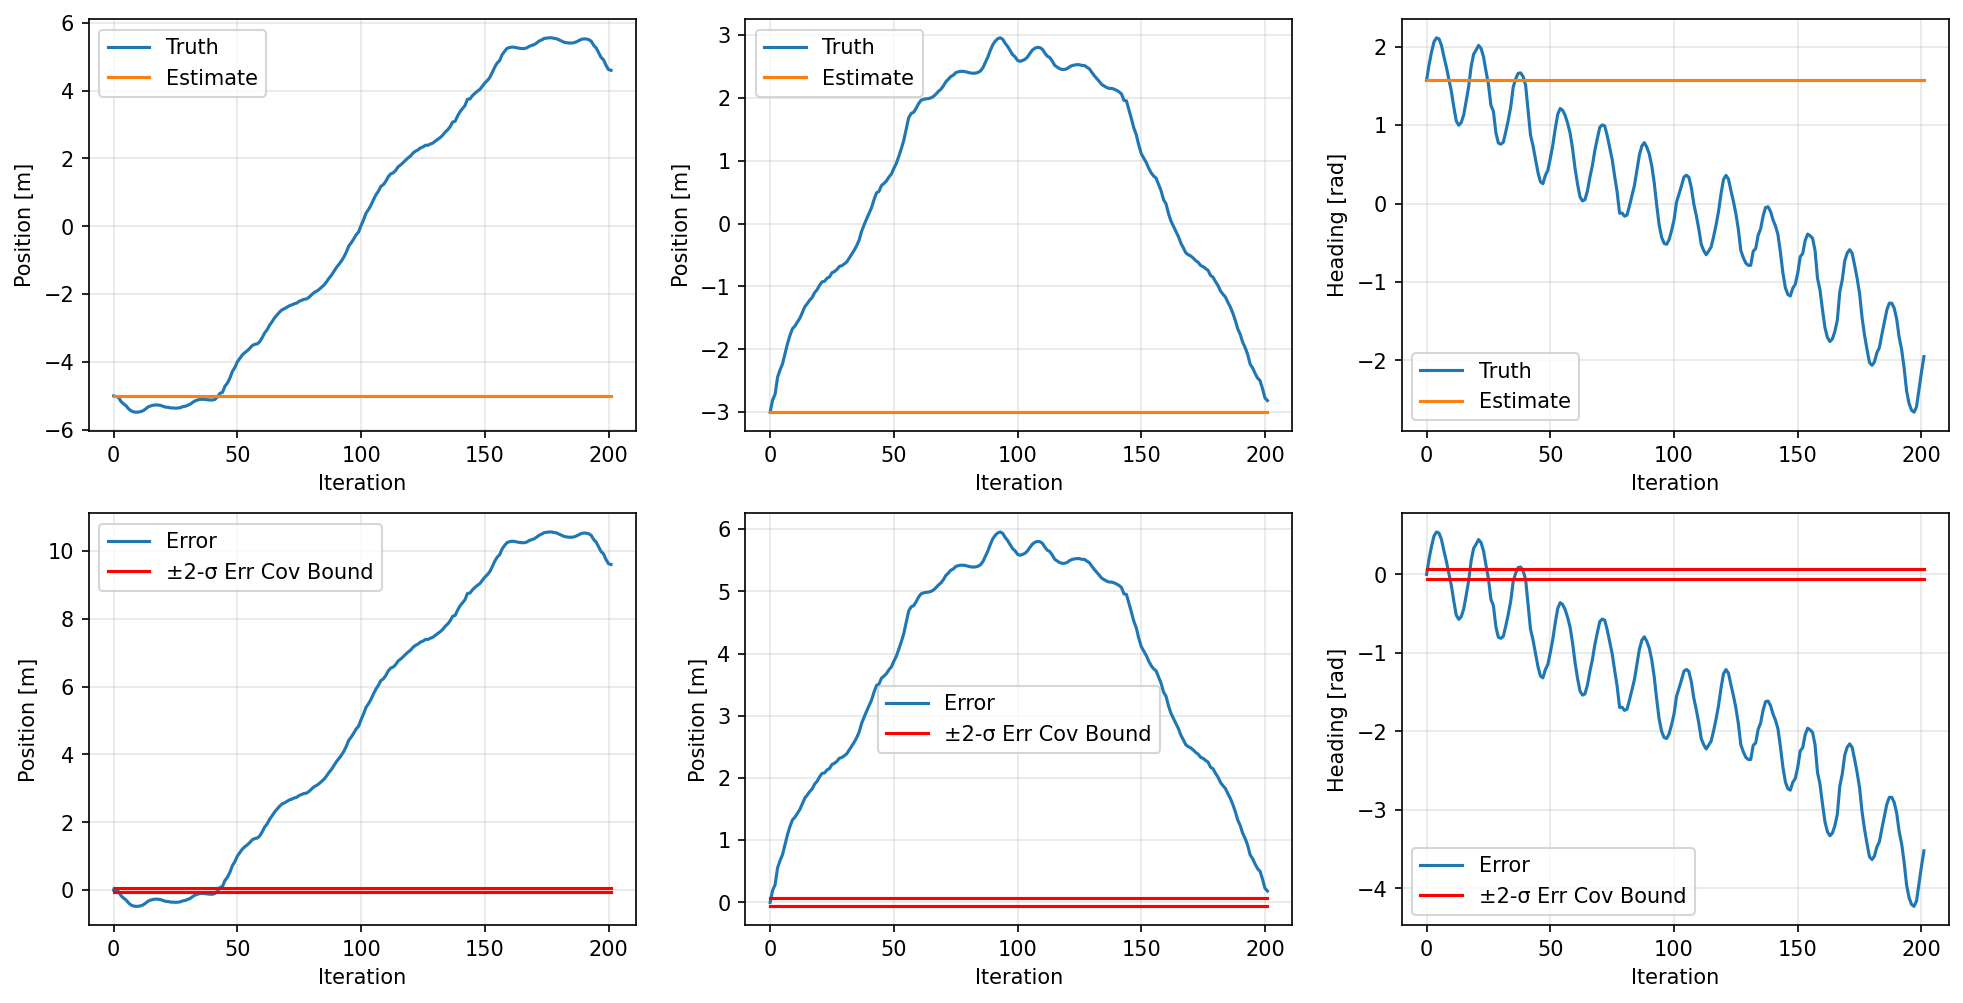

In [ ]:
xgt = np.array(robot.xh)
xhat = np.array(ukf.xhath)
xerr = xgt - xhat
Qdiag = np.array([np.diag(Q) for Q in ukf.Qh]) # variances of est err
σbnd = 2

fig, ax = plt.subplots(2,3,figsize=(16,8))

ylabels = ['Position [m]', 'Position [m]', 'Heading [rad]']

for i in range(3):
    ax[0][i].plot(xgt[:,i],label='Truth')
    ax[0][i].plot(xhat[:,i],label='Estimate')
    ax[0][i].set_xlabel('Iteration')
    ax[0][i].set_ylabel(ylabels[i])
    ax[0][i].legend()
    ax[0][i].grid(alpha=0.3)
    
for i in range(3):
    ax[1][i].plot(xerr[:,i],label='Error')
    ax[1][i].plot( σbnd*np.sqrt(Qdiag[:,i]), label=f'±{σbnd}-σ Err Cov Bound', color='r')
    ax[1][i].plot(-σbnd*np.sqrt(Qdiag[:,i]), color='r')
    ax[1][i].set_xlabel('Iteration')
    ax[1][i].set_ylabel(ylabels[i])
    ax[1][i].legend()
    ax[1][i].grid(alpha=0.3)

### Animation Code for Visualization

In [ ]:
class LocalizationAnimation:
    """
    Utility to visualize robot localization problem
    """
    def __init__(self, robot, ukf):
        """
        Constructor
        
        Parameters
        ----------
        robot : Robot
            Robot object containing state history
        ukf : UKF
            UKF object containing state history
        """
        self.robot = robot
        self.ukf = ukf
    
    def animate(self):
        """
        Generate an animation as an HTML5 video
        """
        X = np.array(self.robot.xh)
        Xhat = np.array(self.ukf.xhath)
        
        dt = self.robot.dt
        T = X.shape[0]
        
        xm = -20
        xM = 20
        ym = -20
        yM = 20
        
        env = plt.figure(figsize=(8, 8), dpi=100)
        ax = env.add_subplot(1, 1, 1)
        ax.set_xlim((xm, xM))
        ax.set_ylim((ym, yM))
        ax.set_title("Robot Environment",fontsize=20)
        ax.set_xlabel("X position [m]", fontsize=16)
        ax.set_ylabel("Y position [m]", fontsize=16)
        
        gt_robot = plt.Circle((X[0, 0], X[0, 1]), 1, fill=False)
        ax.add_artist(gt_robot)
        gt_dir = np.array([[0, np.cos(X[0, 2])], [0, np.sin(X[0, 2])]])
        gt_line, = ax.plot(X[0,0] + gt_dir[0, :], X[0,1] + gt_dir[1, :], 'k', label='Ground Truth')
        gt_traj, = ax.plot(X[0,0], X[0,1], 'k:')
        
        est_robot = plt.Circle((X[0,0], X[0,1]), 1, fill=False, color='r')
        ax.add_artist(est_robot)
        est_dir = np.array([[0, np.cos(X[0, 2])], [0, np.sin(X[0, 2])]])
        est_line, = ax.plot(Xhat[0,0] + est_dir[0, :], Xhat[0,1] + est_dir[1, :], 'r', label='Estimate')
        est_traj, = ax.plot(Xhat[0,0], Xhat[0,1], 'r')
        
        ax.plot(self.robot.L[:, 0], self.robot.L[:, 1], 'gD', label='Landmarks')
        
        ax.legend()
        def animate(i):
            gt_dir = np.array([[0, np.cos(X[i, 2])], [0, np.sin(X[i, 2])]])
            gt_line.set_data(X[i,0] + gt_dir[0, :], X[i,1] + gt_dir[1, :])
            gt_robot.center = X[i,0], X[i,1]
            gt_traj.set_data(X[:i,0], X[:i,1])
            
            est_dir = np.array([[0, np.cos(Xhat[i, 2])], [0, np.sin(Xhat[i, 2])]])
            est_line.set_data(Xhat[i,0] + est_dir[0, :], Xhat[i,1] + est_dir[1, :])
            est_robot.center = Xhat[i,0], Xhat[i,1]
            est_traj.set_data(Xhat[:i,0], Xhat[:i,1])
            return (gt_line,gt_traj,est_line,est_traj,)
        
        anim = animation.FuncAnimation(env, animate, frames=T, interval=dt*500, blit=True)
        return anim.to_html5_video()

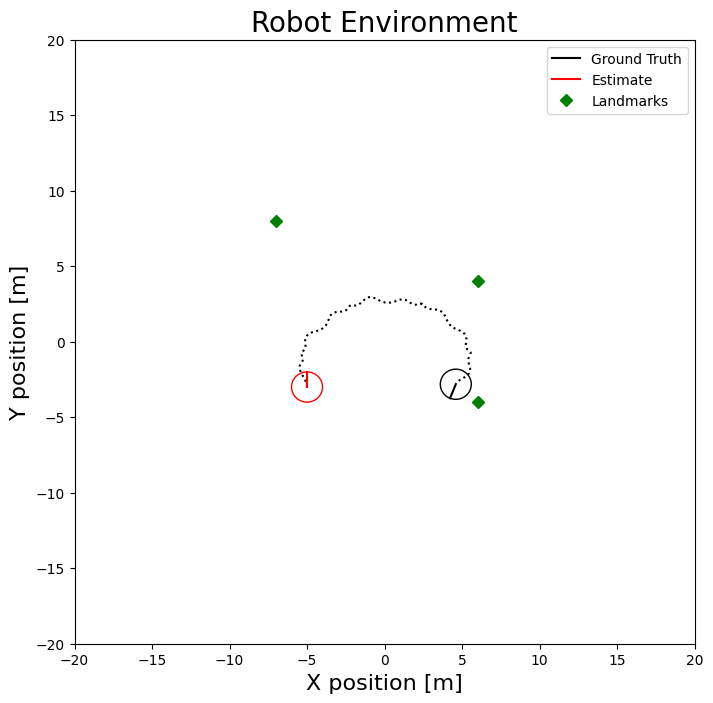

In [ ]:
# generate animation - will take ~20 seconds to make video
ani = LocalizationAnimation(robot, ukf)
HTML(ani.animate())

## LAB

>Note: This lab is a continuation of the lab of assignment 3. You will need some of the equations provided in the formulation and in its solution (see Canvas)

Design a discrete Kalman filter that fuses gyro and accelerometer measurements and provides an estimate of the tilt angle of the IMU. We have provided you with the IMU measurements in the `.pkl` file. For the Kalman filter, you can assume that the sampling time is constant and equal to $dt=0.002$ s.

1. Generate plots of the roll and pitch angles using only gyro integration (i.e., only the *propagation* step of the KF). Comment on the quality of this method for tilt estimation.
1. Generate plots of $y_\phi$ and $y_\theta$ (i.e., using only the accelerometer). Comment on the quality of using only accelerometer measurements for tilt estimation.
1. Implement a Kalman filter for tilt estimation, and plot the evolution of the estimate of the roll and pitch angles as the measurements are processed by the Kalman filter.
1. Plot the diagonal elements of the estimation error covariances (both - and +). Compare these to the solution of the discrete ARE for steady-state.

In [164]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.linalg


def get_acc_angles(a):
    """
    Compute tilt angle (roll, pitch) from accelerometer data
    
    Parameters
    ----------
    a : (3,) np.array
        measurement vector from accelerometer
    
    Return
    ------
    y : (2,1) np.array
        [ϕ, θ] in radians
    """
    
    ϕ = np.arctan2(a[1], np.sqrt(a[0]**2 + a[2]**2))
    θ = np.arctan2(-a[0], np.sqrt(a[1]**2 + a[2]**2))
    
    return np.array([[ϕ], [θ]])



# list of the six orientations
orientations = ["z_up", "z_down", "x_up", "x_down", "y_up", "y_down"]

#gravity constant
g = 9.80665 

dt=0.01 # discretization time in seconds
Ad=np.array([[1,-dt,0,0],[0,1,0,0],[0,0,1,-dt],[0,0,0,1]])
Bd=np.array([[dt,0],[0,0],[0,dt],[0,0]])
Cd=np.array([[1,0,0,0],[0,0,1,0]])

#read the pkl file
with open('lab_imu_data.pkl', 'rb') as f:
    all_data = pickle.load(f)
    for key in all_data:
        all_data[key]=all_data[key].T
    
z = np.empty((0,1))
A = np.empty((0,12))
Mbar=None
bbar=None

# Construct matrix A and vector z
all_fhat = [(0,0,g),(0,0,-g),(g,0,0),(-g,0,0),(0,g,0),(0,-g,0)]  # expected sensed gravity vectors, corresponding to self.orientations
all_pitch_roll_expect=[]
for i in range(len(all_fhat)):
    all_pitch_roll_expect.append(get_acc_angles(np.array(all_fhat[i])))
#print(all_pitch_roll_expect[0].shape)
for index_orientation, str_orientation in enumerate(orientations):
    data=all_data[str_orientation]
    fhat = np.array(all_fhat[index_orientation]).reshape(3,1) # expected gravity vector at this orientation

    # construct A and z using measured gravity vectors
    for i in range(data.shape[1]): #Iterate through the measurements for this orientation
        z=np.concatenate((z,fhat), axis=0)
        A_this_measurement = np.hstack((np.kron(data[:,i].reshape(3,1).T,np.eye(3,3)), -np.eye(3)))
        # A_this_measurement = np.hstack((np.kron(np.eye(3,3),data[:,i]), -np.eye(3)))#If you use this option, then you have to use  Mbar = x[:9].reshape((3,3)), not Mbar = x[:9].reshape((3,3)).T
        A=np.concatenate((A,A_this_measurement), axis=0)
        

#Solve least squares problem
x, res, rnk, s = np.linalg.lstsq(A, z, rcond=None)


# Obtain Mbar and bbar (calibraton model) from the least squares solution
Mbar = x[:9].reshape((3,3)).T #Note that we need transpose due to the way the vectorization operator is defined, see https://en.wikipedia.org/wiki/Vectorization_(mathematics)
bbar = x[9:12]

bp=bbar[0]
bq=bbar[1]

def plotData(data_to_plot, fhat, str_orientation):
    ax=axes[index_orientation]; #arrangePlot('Position', 'p(t)')
    for i in range(3): 
        ax.plot(data_to_plot[i,:])
        ax.grid(); ax.set_title(str_orientation); ax.set_xlabel('index meas.'); ax.set_ylabel('accel (m/s2)');
        ax.axhline(y=fhat[i,0], color='r', linestyle='--')  
#def plotDataPR(data_to_plot, str_orientation):
    #ax=axes[index_orientation]; #arrangePlot('Position', 'p(t)')
    #for i in range(2): 
        #ax.plot(data_to_plot[i,:])
        #ax.grid(); ax.set_title(str_orientation); ax.set_xlabel('index meas.'); ax.set_ylabel('Pitch&Roll (rad)');
        #ax.axhline(y=all_pitch_roll_expect[index_orientation], color='r', linestyle='--')  


#Plots

##Before calibration
fig, axes = plt.subplots(1,6,figsize=(30, 5)); fig.suptitle("BEFORE CALIBRATION",fontweight="bold")
for index_orientation, str_orientation in enumerate(orientations):
    plotData(all_data[str_orientation], np.array(all_fhat[index_orientation]).reshape(3,1), str_orientation)
        
##After calibration
#fig, axes = plt.subplots(1,6,figsize=(30, 5)); fig.suptitle("AFTER CALIBRATION",fontweight="bold")
for index_orientation, str_orientation in enumerate(orientations):
    data=all_data[str_orientation]
    f = Mbar @ data - bbar
    #plotData(f, np.array(all_fhat[index_orientation]).reshape(3,1), str_orientation)
    ax= f[0,:] #f conains calibrated data, while ax is the IMU acceleration measured on Ox axis
    ay= f[1,:]
    az= f[2,:]
    #print(get_acc_angles(data))
    std=np.std(get_acc_angles(f),axis=2)
    Rd=np.array([[std[0]**2,0],[0,std[1]**2]]) #measurement noise covariance

    pitch=get_acc_angles(f)[0]
    roll=get_acc_angles(f)[1]
    #print(pitch.reshape((1,pitch.shape[1])))
    plt.plot(np.arange(pitch.shape[1]).reshape((1,pitch.shape[1])),pitch,'r.',label='pitch')
    plt.plot(np.arange(roll.shape[1]).reshape((1,roll.shape[1])),roll,'b.',label='roll')
    plt.xlabel('index measurement')
    plt.ylabel('Pitch&Roll')
    expected_pitch=all_pitch_roll_expect[index_orientation][0]
    print(expected_pitch)
    #plt.axhline(y=expected_pitch,xmin=0,xmax=1000,color='r',linestyle='-')
    plt.legend()
    plt.title(str_orientation)
    plt.show()
    
    
    
    
    
    xkk=np.array([all_pitch_roll_expect[index_orientation][0],bp,all_pitch_roll_expect[index_orientation][1],bq])
    xkk.reshape(4,1)
    Qkk=np.eye(4) #it is a 4x4 matrix
    Q00=[];Q11=[];Q22=[];Q33=[]
    print(xkk.shape)
    for k in range(pitch.shape[1]): #do kamlan filtering
        xkk_1=np.matmul(Ad,xkk)
        Qkk_1=np.matmul(Ad,np.matmul(Qkk,Ad.T)) # + Wk, which is zero in this case
        Lk=np.matmul(Qkk_1,np.matmul(Cd.T,np.linalg.inv(np.matmul(Cd,np.matmul(Qkk_1,Cd.T))+Rd)))
        xkk=xkk_1+np.matmul(Lk,pitch[k]-np.matmul(Cd,xkk_1))
        Qkk=np.matmul(np.eye(4)-np.matmul(Lk,Cd),Qkk_1)
        Q00.append(Qkk[0,0])
        Q11.append(Qkk[1,1])
        Q22.append(Qkk[2,2])
        Q33.append(Qkk[3,3])

plt.plot(np.arange(roll.shape[1]).reshape((1,roll.shape[1])),Q00, label="Q00")
plt.plot(np.arange(roll.shape[1]).reshape((1,roll.shape[1])),Q11, label="Q11")
plt.plot(np.arange(roll.shape[1]).reshape((1,roll.shape[1])),Q22, label="Q22")
plt.plot(np.arange(roll.shape[1]).reshape((1,roll.shape[1])),Q33, label="Q33")
plt.legend()
plt.show()


print(all_data)

<ipython-input-164-e848c18e9a48>:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Rd=np.array([[std[0]**2,0],[0,std[1]**2]]) #measurement noise covariance


[0.]


/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 3615x274688 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 4500x750 with 6 Axes>

<ipython-input-164-e848c18e9a48>:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Rd=np.array([[std[0]**2,0],[0,std[1]**2]]) #measurement noise covariance


[0.]


/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 924x245850 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 900x600 with 1 Axes>

<ipython-input-164-e848c18e9a48>:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Rd=np.array([[std[0]**2,0],[0,std[1]**2]]) #measurement noise covariance


[0.]


/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 864x232539 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 900x600 with 1 Axes>

<ipython-input-164-e848c18e9a48>:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Rd=np.array([[std[0]**2,0],[0,std[1]**2]]) #measurement noise covariance


[0.]


/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 836x276048 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 900x600 with 1 Axes>

<ipython-input-164-e848c18e9a48>:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Rd=np.array([[std[0]**2,0],[0,std[1]**2]]) #measurement noise covariance


[1.571]


/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 836x352732 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 900x600 with 1 Axes>

<ipython-input-164-e848c18e9a48>:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Rd=np.array([[std[0]**2,0],[0,std[1]**2]]) #measurement noise covariance


[-1.571]


/opt/conda/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 864x368825 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 900x600 with 1 Axes>

{'x_up': array([[ 9.979,  9.955,  9.995, ..., 10.017,  9.988,  9.964],
       [ 0.257,  0.307,  0.3  , ...,  0.312,  0.3  ,  0.333],
       [ 0.214,  0.262,  0.235, ...,  0.305,  0.252,  0.319]]), 'y_up': array([[ 1.479e-01,  1.456e-01,  1.240e-01, ...,  1.671e-01,  1.288e-01,
         1.192e-01],
       [ 9.766e+00,  9.740e+00,  9.656e+00, ...,  9.769e+00,  9.680e+00,
         9.709e+00],
       [ 1.273e-02, -8.820e-03,  6.779e-02, ...,  1.324e-01,  8.695e-02,
         1.779e-01]]), 'z_up': array([[ 0.107,  0.1  ,  0.1  , ...,  0.067,  0.031,  0.038],
       [-0.215, -0.186, -0.208, ..., -0.241, -0.253, -0.174],
       [ 9.834,  9.882,  9.87 , ...,  9.973,  9.884,  9.906]]), 'x_down': array([[-9.690e+00, -9.635e+00, -9.683e+00, ..., -9.551e+00, -9.726e+00,
        -9.707e+00],
       [-2.103e-01, -1.935e-01, -1.840e-01, ..., -1.552e-01, -1.911e-01,
        -1.888e-01],
       [ 6.061e-02,  3.906e-02, -4.473e-02, ...,  7.019e-02, -4.031e-03,
         1.752e-02]]), 'y_down': array([[-0.